In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
import seaborn as sns

In [32]:
# Load the datasets with no header and then assign proper column names
training_data = pd.read_csv('C:/Users/jobkg/OneDrive/Desktop/Prodigy Task 4/Datasets/twitter_training.csv', encoding='latin1', header=None)
validation_data = pd.read_csv('C:/Users/jobkg/OneDrive/Desktop/Prodigy Task 4/Datasets/twitter_validation.csv', encoding='latin1', header=None)


C:\Users\jobkg\AppData\Local\Temp\ipykernel_23260\635396080.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=train_sentiment_dist.index, y=train_sentiment_dist.values, ax=axes[0], palette="viridis")
C:\Users\jobkg\AppData\Local\Temp\ipykernel_23260\635396080.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=valid_sentiment_dist.index, y=valid_sentiment_dist.values, ax=axes[1], palette="magma")


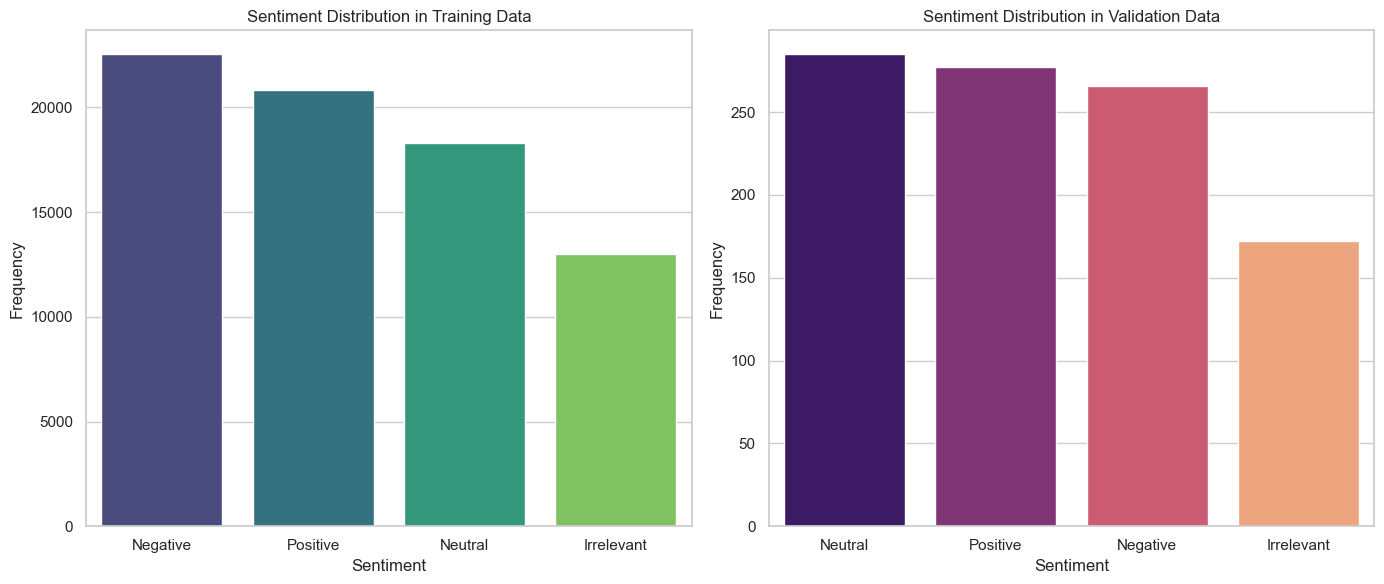

In [33]:


# Assign column names
training_data.columns = ['ID', 'Entity', 'Sentiment', 'Text']
validation_data.columns = ['ID', 'Entity', 'Sentiment', 'Text']

# Set the style for seaborn
sns.set(style="whitegrid")

# Sentiment distribution in the training data
train_sentiment_dist = training_data['Sentiment'].value_counts()

# Sentiment distribution in the validation data
valid_sentiment_dist = validation_data['Sentiment'].value_counts()

# Plotting the sentiment distribution for both datasets
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Training Data
sns.barplot(x=train_sentiment_dist.index, y=train_sentiment_dist.values, ax=axes[0], palette="viridis")
axes[0].set_title('Sentiment Distribution in Training Data')
axes[0].set_xlabel('Sentiment')
axes[0].set_ylabel('Frequency')

# Validation Data
sns.barplot(x=valid_sentiment_dist.index, y=valid_sentiment_dist.values, ax=axes[1], palette="magma")
axes[1].set_title('Sentiment Distribution in Validation Data')
axes[1].set_xlabel('Sentiment')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


<Figure size 1400x800 with 0 Axes>

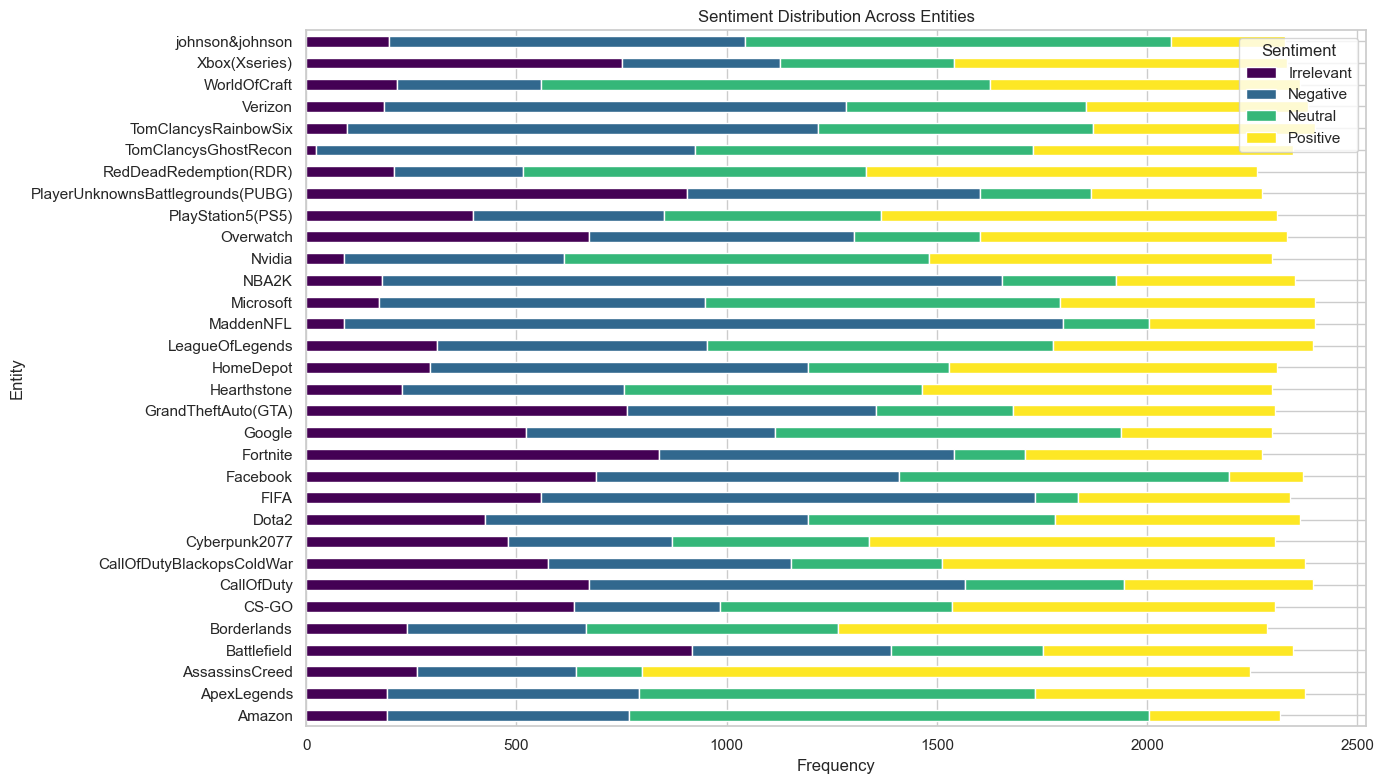

In [34]:


# Set the style for seaborn
sns.set(style="whitegrid")

# Grouping by Entity and Sentiment to get the count
entity_sentiment = training_data.groupby(['Entity', 'Sentiment']).size().unstack().fillna(0)

# Plotting the data as a horizontal bar chart
plt.figure(figsize=(14, 8))
entity_sentiment.plot(kind='barh', stacked=True, colormap='viridis', figsize=(14,8))
plt.title('Sentiment Distribution Across Entities')
plt.xlabel('Frequency')
plt.ylabel('Entity')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()


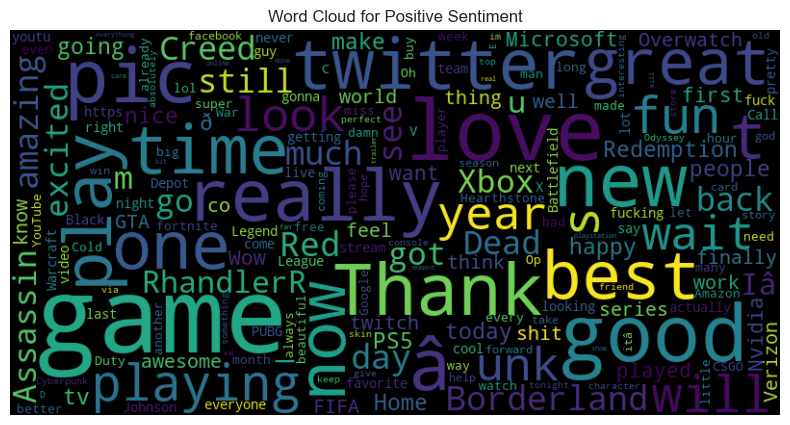

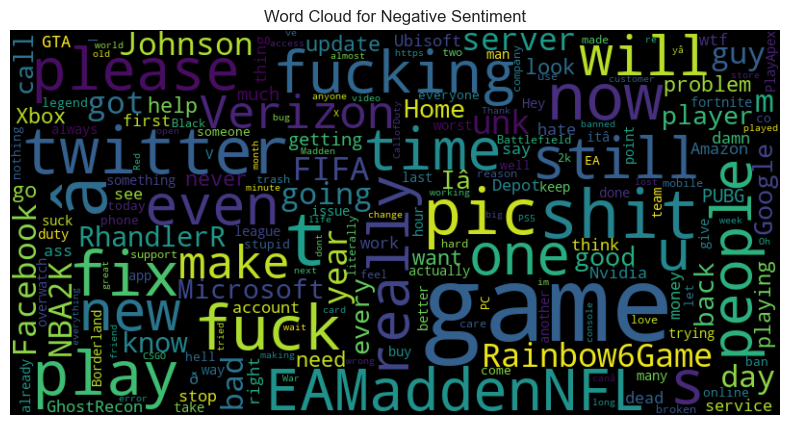

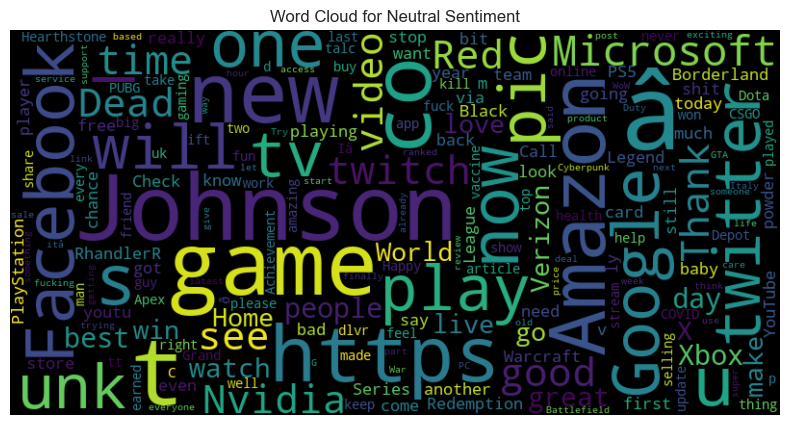

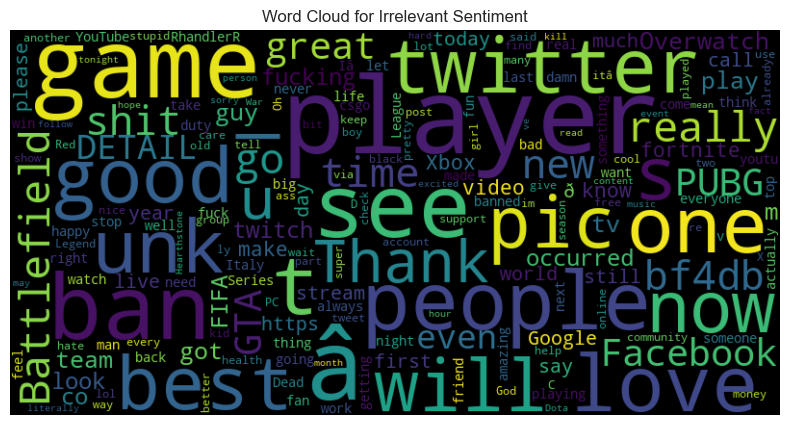

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word clouds for each sentiment
sentiments = ['Positive', 'Negative', 'Neutral', 'Irrelevant']

for sentiment in sentiments:
    # Convert to string and drop NaN values
    text_data = training_data[training_data['Sentiment'] == sentiment]['Text'].dropna().astype(str)
    
    # Join the text data into a single string
    text = " ".join(text_data)
    
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, max_font_size=110, collocations=False, colormap='viridis').generate(text)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.axis('off')
    plt.show()


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Preparing the data
X = training_data['Text'].fillna('')  
y = training_data['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Building the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

# Predicting on the test set
y_pred = model.predict(X_test_vec)

# Evaluating the model
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')


              precision    recall  f1-score   support

  Irrelevant       0.66      0.53      0.59      2592
    Negative       0.73      0.79      0.76      4519
     Neutral       0.69      0.62      0.65      3596
    Positive       0.67      0.75      0.71      4230

    accuracy                           0.69     14937
   macro avg       0.69      0.67      0.68     14937
weighted avg       0.69      0.69      0.69     14937

Accuracy: 0.69
